In [76]:
!pip install PyYAML
!pip install stopwordsiso==0.6.1
!pip install emoji==1.6.3
! pip install googletrans
! pip install langdetect
! pip install vaderSentiment
! pip install textblob
!pip install cucco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from cucco import Cucco
from nltk.stem import SnowballStemmer
import nltk
import stopwordsiso
from stopwordsiso import stopwords
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

LOADING DATASET

In [78]:
df = pd.read_csv('TrainProject.csv')
df.head()
# lang = df.groupby('language')
# lang.first()

,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English


In [79]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      9491 non-null   object 
 1   label     9491 non-null   float64
 2   language  9491 non-null   object 
dtypes: float64(1), object(2)
memory usage: 222.6+ KB


In [80]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [81]:
# function for remove stopwords, punctuations, numbers
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('[0-9]+', '', text)
    text = [word for word in text.split() if word.lower() not in stop_word_list]
    return " ".join(text)

In [82]:
from snowballstemmer import TurkishStemmer
def stemming_tokenizer(text): 
    stemmer = TurkishStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]

In [83]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [84]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\u231A-\u231B"
        u"\u23E9-\u23EC"
        u"\u25FD-\u25FE"
        u"\u2614-\u2615"
        u"\u2648-\u2653"
        u"\u26AA-\u26AB"
        u"\u26BD-\u26BE"
        u"\u26C4-\u26C5"
        u"\u26F2-\u26F3"
        u"\u270A-\u270B"
        u"\u2753-\u2755"
        u"\u2795-\u2797"
        u"\u2B1B-\u2B1C"
        u"\U0001F191-\U0001F19A"
        u"\U0001F232-\U0001F236"
        u"\U0001F238-\U0001F23A"
        u"\U0001F250-\U0001F251"
        u"\U0001F300-\U0001F30C"
        u"\U0001F30D-\U0001F30E"
        u"\U0001F313-\U0001F315"
        u"\U0001F316-\U0001F318"
        u"\U0001F31D-\U0001F31E"
        u"\U0001F31F-\U0001F320"
        u"\U0001F32D-\U0001F32F"
        u"\U0001F330-\U0001F331"
        u"\U0001F332-\U0001F333"
        u"\U0001F334-\U0001F335"
        u"\U0001F337-\U0001F34A"
        u"\U0001F34C-\U0001F34F"
        u"\U0001F351-\U0001F37B"
        u"\U0001F37E-\U0001F37F"
        u"\U0001F380-\U0001F393"
        u"\U0001F3A0-\U0001F3C4"
        u"\U0001F3CF-\U0001F3D3"
        u"\U0001F3E0-\U0001F3E3"
        u"\U0001F3E5-\U0001F3F0"
        u"\U0001F3F8-\U0001F407"
        u"\U0001F409-\U0001F40B"
        u"\U0001F40C-\U0001F40E"
        u"\U0001F40F-\U0001F410"
        u"\U0001F411-\U0001F412"
        u"\U0001F417-\U0001F429"
        u"\U0001F42B-\U0001F43E"
        u"\U0001F442-\U0001F464"
        u"\U0001F466-\U0001F46B"
        u"\U0001F46C-\U0001F46D"
        u"\U0001F46E-\U0001F4AC"
        u"\U0001F4AE-\U0001F4B5"
        u"\U0001F4B6-\U0001F4B7"
        u"\U0001F4B8-\U0001F4EB"
        u"\U0001F4EC-\U0001F4ED"
        u"\U0001F4F0-\U0001F4F4"
        u"\U0001F4F6-\U0001F4F7"
        u"\U0001F4F9-\U0001F4FC"
        u"\U0001F4FF-\U0001F502"
        u"\U0001F504-\U0001F507"
        u"\U0001F50A-\U0001F514"
        u"\U0001F516-\U0001F52B"
        u"\U0001F52C-\U0001F52D"
        u"\U0001F52E-\U0001F53D"
        u"\U0001F54B-\U0001F54E"
        u"\U0001F550-\U0001F55B"
        u"\U0001F55C-\U0001F567"
        u"\U0001F595-\U0001F596"
        u"\U0001F5FB-\U0001F5FF"
        u"\U0001F601-\U0001F606"
        u"\U0001F607-\U0001F608"
        u"\U0001F609-\U0001F60D"
        u"\U0001F612-\U0001F614"
        u"\U0001F61C-\U0001F61E"
        u"\U0001F620-\U0001F625"
        u"\U0001F626-\U0001F627"
        u"\U0001F628-\U0001F62B"
        u"\U0001F62E-\U0001F62F"
        u"\U0001F630-\U0001F633"
        u"\U0001F637-\U0001F640"
        u"\U0001F641-\U0001F644"
        u"\U0001F645-\U0001F64F"
        u"\U0001F681-\U0001F682"
        u"\U0001F683-\U0001F685"
        u"\U0001F68A-\U0001F68B"
        u"\U0001F691-\U0001F693"
        u"\U0001F699-\U0001F69A"
        u"\U0001F69B-\U0001F6A1"
        u"\U0001F6A4-\U0001F6A5"
        u"\U0001F6A7-\U0001F6AD"
        u"\U0001F6AE-\U0001F6B1"
        u"\U0001F6B3-\U0001F6B5"
        u"\U0001F6B7-\U0001F6B8"
        u"\U0001F6B9-\U0001F6BE"
        u"\U0001F6C1-\U0001F6C5"
        u"\U0001F6D1-\U0001F6D2"
        u"\U0001F6D6-\U0001F6D7"
        u"\U0001F6DD-\U0001F6DF"
        u"\U0001F6EB-\U0001F6EC"
        u"\U0001F6F4-\U0001F6F6"
        u"\U0001F6F7-\U0001F6F8"
        u"\U0001F6FB-\U0001F6FC"
        u"\U0001F7E0-\U0001F7EB"
        u"\U0001F90D-\U0001F90F"
        u"\U0001F910-\U0001F918"
        u"\U0001F919-\U0001F91E"
        u"\U0001F920-\U0001F927"
        u"\U0001F928-\U0001F92F"
        u"\U0001F931-\U0001F932"
        u"\U0001F933-\U0001F93A"
        u"\U0001F93C-\U0001F93E"
        u"\U0001F940-\U0001F945"
        u"\U0001F947-\U0001F94B"
        u"\U0001F94D-\U0001F94F"
        u"\U0001F950-\U0001F95E"
        u"\U0001F95F-\U0001F96B"
        u"\U0001F96C-\U0001F970"
        u"\U0001F973-\U0001F976"
        u"\U0001F977-\U0001F978"
        u"\U0001F97C-\U0001F97F"
        u"\U0001F980-\U0001F984"
        u"\U0001F985-\U0001F991"
        u"\U0001F992-\U0001F997"
        u"\U0001F998-\U0001F9A2"
        u"\U0001F9A3-\U0001F9A4"
        u"\U0001F9A5-\U0001F9AA"
        u"\U0001F9AB-\U0001F9AD"
        u"\U0001F9AE-\U0001F9AF"
        u"\U0001F9B0-\U0001F9B9"
        u"\U0001F9BA-\U0001F9BF"
        u"\U0001F9C1-\U0001F9C2"
        u"\U0001F9C3-\U0001F9CA"
        u"\U0001F9CD-\U0001F9CF"
        u"\U0001F9D0-\U0001F9E6"
        u"\U0001F9E7-\U0001F9FF"
        u"\U0001FA70-\U0001FA73"
        u"\U0001FA78-\U0001FA7A"
        u"\U0001FA7B-\U0001FA7C"
        u"\U0001FA80-\U0001FA82"
        u"\U0001FA83-\U0001FA86"
        u"\U0001FA90-\U0001FA95"
        u"\U0001FA96-\U0001FAA8"
        u"\U0001FAA9-\U0001FAAC"
        u"\U0001FAB0-\U0001FAB6"
        u"\U0001FAB7-\U0001FABA"
        u"\U0001FAC0-\U0001FAC2"
        u"\U0001FAC3-\U0001FAC5"
        u"\U0001FAD0-\U0001FAD6"
        u"\U0001FAD7-\U0001FAD9"
        u"\U0001FAE0-\U0001FAE7"
        u"\U0001FAF0-\U0001FAF6"
        u"\u23F0"
        u"\u23F3"
        u"\u267F"
        u"\u2693"
        u"\u26A1"
        u"\u26CE"
        u"\u26D4"
        u"\u26EA"
        u"\u26F5"
        u"\u26FA"
        u"\u26FD"
        u"\u2705"
        u"\u2728"
        u"\u274C"
        u"\u274E"
        u"\u2757"
        u"\u27B0"
        u"\u27BF"
        u"\u2B50"
        u"\u2B55"
        u"\U0001F004"
        u"\U0001F0CF"
        u"\U0001F18E"
        u"\U0001F201"
        u"\U0001F21A"
        u"\U0001F22F"
        u"\U0001F30F"
        u"\U0001F310"
        u"\U0001F311"
        u"\U0001F312"
        u"\U0001F319"
        u"\U0001F31A"
        u"\U0001F31B"
        u"\U0001F31C"
        u"\U0001F34B"
        u"\U0001F350"
        u"\U0001F37C"
        u"\U0001F3C5"
        u"\U0001F3C6"
        u"\U0001F3C7"
        u"\U0001F3C8"
        u"\U0001F3C9"
        u"\U0001F3CA"
        u"\U0001F3E4"
        u"\U0001F3F4"
        u"\U0001F408"
        u"\U0001F413"
        u"\U0001F414"
        u"\U0001F415"
        u"\U0001F416"
        u"\U0001F42A"
        u"\U0001F440"
        u"\U0001F465"
        u"\U0001F4AD"
        u"\U0001F4EE"
        u"\U0001F4EF"
        u"\U0001F4F5"
        u"\U0001F4F8"
        u"\U0001F503"
        u"\U0001F508"
        u"\U0001F509"
        u"\U0001F515"
        u"\U0001F57A"
        u"\U0001F5A4"
        u"\U0001F600"
        u"\U0001F60E"
        u"\U0001F60F"
        u"\U0001F610"
        u"\U0001F611"
        u"\U0001F615"
        u"\U0001F616"
        u"\U0001F617"
        u"\U0001F618"
        u"\U0001F619"
        u"\U0001F61A"
        u"\U0001F61B"
        u"\U0001F61F"
        u"\U0001F62C"
        u"\U0001F62D"
        u"\U0001F634"
        u"\U0001F635"
        u"\U0001F636"
        u"\U0001F680"
        u"\U0001F686"
        u"\U0001F687"
        u"\U0001F688"
        u"\U0001F689"
        u"\U0001F68C"
        u"\U0001F68D"
        u"\U0001F68E"
        u"\U0001F68F"
        u"\U0001F690"
        u"\U0001F694"
        u"\U0001F695"
        u"\U0001F696"
        u"\U0001F697"
        u"\U0001F698"
        u"\U0001F6A2"
        u"\U0001F6A3"
        u"\U0001F6A6"
        u"\U0001F6B2"
        u"\U0001F6B6"
        u"\U0001F6BF"
        u"\U0001F6C0"
        u"\U0001F6CC"
        u"\U0001F6D0"
        u"\U0001F6D5"
        u"\U0001F6F9"
        u"\U0001F6FA"
        u"\U0001F7F0"
        u"\U0001F90C"
        u"\U0001F91F"
        u"\U0001F930"
        u"\U0001F93F"
        u"\U0001F94C"
        u"\U0001F971"
        u"\U0001F972"
        u"\U0001F979"
        u"\U0001F97A"
        u"\U0001F97B"
        u"\U0001F9C0"
        u"\U0001F9CB"
        u"\U0001F9CC"
        u"\U0001FA74"
        u"\u00A9"
        u"\uFE0F"
        u"\u00AE"
        u"\uFE0F"
        u"\u203C"
        u"\uFE0F"
        u"\u2049"
        u"\uFE0F"
        u"\u2122"
        u"\uFE0F"
        u"\u2139"
        u"\uFE0F"
        u"\u2194"
        u"\uFE0F"
        u"\u2195"
        u"\uFE0F"
        u"\u2196"
        u"\uFE0F"
        u"\u2197"
        u"\uFE0F"
        u"\u2198"
        u"\uFE0F"
        u"\u2199"
        u"\uFE0F"
        u"\u21A9"
        u"\uFE0F"
        u"\u21AA"
        u"\uFE0F"
        u"\u2328"
        u"\uFE0F"
        u"\u23CF"
        u"\uFE0F"
        u"\u23ED"
        u"\uFE0F"
        u"\u23EE"
        u"\uFE0F"
        u"\u23EF"
        u"\uFE0F"
        u"\u23F1"
        u"\uFE0F"
        u"\u23F2"
        u"\uFE0F"
        u"\u23F8"
        u"\uFE0F"
        u"\u23F9"
        u"\uFE0F"
        u"\u23FA"
        u"\uFE0F"
        u"\u24C2"
        u"\uFE0F"
        u"\u25AA"
        u"\uFE0F"
        u"\u25AB"
        u"\uFE0F"
        u"\u25B6"
        u"\uFE0F"
        u"\u25C0"
        u"\uFE0F"
        u"\u25FB"
        u"\uFE0F"
        u"\u25FC"
        u"\uFE0F"
        u"\u2600"
        u"\uFE0F"
        u"\u2601"
        u"\uFE0F"
        u"\u2602"
        u"\uFE0F"
        u"\u2603"
        u"\uFE0F"
        u"\u2604"
        u"\uFE0F"
        u"\u260E"
        u"\uFE0F"
        u"\u2611"
        u"\uFE0F"
        u"\u2618"
        u"\uFE0F"
        u"\u261D"
        u"\uFE0F"
        u"\u2620"
        u"\uFE0F"
        u"\u2622"
        u"\uFE0F"
        u"\u2623"
        u"\uFE0F"
        u"\u2626"
        u"\uFE0F"
        u"\u262A"
        u"\uFE0F"
        u"\u262E"
        u"\uFE0F"
        u"\u262F"
        u"\uFE0F"
        u"\u2638"
        u"\uFE0F"
        u"\u2639"
        u"\uFE0F"
        u"\u263A"
        u"\uFE0F"
        u"\u2640"
        u"\uFE0F"
        u"\u2642"
        u"\uFE0F"
        u"\u265F"
        u"\uFE0F"
        u"\u2660"
        u"\uFE0F"
        u"\u2663"
        u"\uFE0F"
        u"\u2665"
        u"\uFE0F"
        u"\u2666"
        u"\uFE0F"
        u"\u2668"
        u"\uFE0F"
        u"\u267B"
        u"\uFE0F"
        u"\u267E"
        u"\uFE0F"
        u"\u2692"
        u"\uFE0F"
        u"\u2694"
        u"\uFE0F"
        u"\u2695"
        u"\uFE0F"
        u"\u2696"
        u"\uFE0F"
        u"\u2697"
        u"\uFE0F"
        u"\u2699"
        u"\uFE0F"
        u"\u269B"
        u"\uFE0F"
        u"\u269C"
        u"\uFE0F"
        u"\u26A0"
        u"\uFE0F"
        u"\u26A7"
        u"\uFE0F"
        u"\u26B0"
        u"\uFE0F"
        u"\u26B1"
        u"\uFE0F"
        u"\u26C8"
        u"\uFE0F"
        u"\u26CF"
        u"\uFE0F"
        u"\u26D1"
        u"\uFE0F"
        u"\u26D3"
        u"\uFE0F"
        u"\u26E9"
        u"\uFE0F"
        u"\u26F0"
        u"\uFE0F"
        u"\u26F1"
        u"\uFE0F"
        u"\u26F4"
        u"\uFE0F"
        u"\u26F7"
        u"\uFE0F"
        u"\u26F8"
        u"\uFE0F"
        u"\u26F9"
        u"\uFE0F"
        u"\u2702"
        u"\uFE0F"
        u"\u2708"
        u"\uFE0F"
        u"\u2709"
        u"\uFE0F"
        u"\u270C"
        u"\uFE0F"
        u"\u270D"
        u"\uFE0F"
        u"\u270F"
        u"\uFE0F"
        u"\u2712"
        u"\uFE0F"
        u"\u2714"
        u"\uFE0F"
        u"\u2716"
        u"\uFE0F"
        u"\u271D"
        u"\uFE0F"
        u"\u2721"
        u"\uFE0F"
        u"\u2733"
        u"\uFE0F"
        u"\u2734"
        u"\uFE0F"
        u"\u2744"
        u"\uFE0F"
        u"\u2747"
        u"\uFE0F"
        u"\u2763"
        u"\uFE0F"
        u"\u2764"
        u"\uFE0F"
        u"\u27A1"
        u"\uFE0F"
        u"\u2934"
        u"\uFE0F"
        u"\u2935"
        u"\uFE0F"
        u"\u2B05"
        u"\uFE0F"
        u"\u2B06"
        u"\uFE0F"
        u"\u2B07"
        u"\uFE0F"
        u"\u3030"
        u"\uFE0F"
        u"\u303D"
        u"\uFE0F"
        u"\u3297"
        u"\uFE0F"
        u"\u3299"
        u"\uFE0F"
        u"\U0001F170"
        u"\uFE0F"
        u"\U0001F171"
        u"\uFE0F"
        u"\U0001F17E"
        u"\uFE0F"
        u"\U0001F17F"
        u"\uFE0F"
        u"\U0001F202"
        u"\uFE0F"
        u"\U0001F237"
        u"\uFE0F"
        u"\U0001F321"
        u"\uFE0F"
        u"\U0001F324"
        u"\uFE0F"
        u"\U0001F325"
        u"\uFE0F"
        u"\U0001F326"
        u"\uFE0F"
        u"\U0001F327"
        u"\uFE0F"
        u"\U0001F328"
        u"\uFE0F"
        u"\U0001F329"
        u"\uFE0F"
        u"\U0001F32A"
        u"\uFE0F"
        u"\U0001F32B"
        u"\uFE0F"
        u"\U0001F32C"
        u"\uFE0F"
        u"\U0001F336"
        u"\uFE0F"
        u"\U0001F37D"
        u"\uFE0F"
        u"\U0001F396"
        u"\uFE0F"
        u"\U0001F397"
        u"\uFE0F"
        u"\U0001F399"
        u"\uFE0F"
        u"\U0001F39A"
        u"\uFE0F"
        u"\U0001F39B"
        u"\uFE0F"
        u"\U0001F39E"
        u"\uFE0F"
        u"\U0001F39F"
        u"\uFE0F"
        u"\U0001F3CB"
        u"\uFE0F"
        u"\U0001F3CC"
        u"\uFE0F"
        u"\U0001F3CD"
        u"\uFE0F"
        u"\U0001F3CE"
        u"\uFE0F"
        u"\U0001F3D4"
        u"\uFE0F"
        u"\U0001F3D5"
        u"\uFE0F"
        u"\U0001F3D6"
        u"\uFE0F"
        u"\U0001F3D7"
        u"\uFE0F"
        u"\U0001F3D8"
        u"\uFE0F"
        u"\U0001F3D9"
        u"\uFE0F"
        u"\U0001F3DA"
        u"\uFE0F"
        u"\U0001F3DB"
        u"\uFE0F"
        u"\U0001F3DC"
        u"\uFE0F"
        u"\U0001F3DD"
        u"\uFE0F"
        u"\U0001F3DE"
        u"\uFE0F"
        u"\U0001F3DF"
        u"\uFE0F"
        u"\U0001F3F3"
        u"\uFE0F"
        u"\U0001F3F5"
        u"\uFE0F"
        u"\U0001F3F7"
        u"\uFE0F"
        u"\U0001F43F"
        u"\uFE0F"
        u"\U0001F441"
        u"\uFE0F"
        u"\U0001F4FD"
        u"\uFE0F"
        u"\U0001F549"
        u"\uFE0F"
        u"\U0001F54A"
        u"\uFE0F"
        u"\U0001F56F"
        u"\uFE0F"
        u"\U0001F570"
        u"\uFE0F"
        u"\U0001F573"
        u"\uFE0F"
        u"\U0001F574"
        u"\uFE0F"
        u"\U0001F575"
        u"\uFE0F"
        u"\U0001F576"
        u"\uFE0F"
        u"\U0001F577"
        u"\uFE0F"
        u"\U0001F578"
        u"\uFE0F"
        u"\U0001F579"
        u"\uFE0F"
        u"\U0001F587"
        u"\uFE0F"
        u"\U0001F58A"
        u"\uFE0F"
        u"\U0001F58B"
        u"\uFE0F"
        u"\U0001F58C"
        u"\uFE0F"
        u"\U0001F58D"
        u"\uFE0F"
        u"\U0001F590"
        u"\uFE0F"
        u"\U0001F5A5"
        u"\uFE0F"
        u"\U0001F5A8"
        u"\uFE0F"
        u"\U0001F5B1"
        u"\uFE0F"
        u"\U0001F5B2"
        u"\uFE0F"
        u"\U0001F5BC"
        u"\uFE0F"
        u"\U0001F5C2"
        u"\uFE0F"
        u"\U0001F5C3"
        u"\uFE0F"
        u"\U0001F5C4"
        u"\uFE0F"
        u"\U0001F5D1"
        u"\uFE0F"
        u"\U0001F5D2"
        u"\uFE0F"
        u"\U0001F5D3"
        u"\uFE0F"
        u"\U0001F5DC"
        u"\uFE0F"
        u"\U0001F5DD"
        u"\uFE0F"
        u"\U0001F5DE"
        u"\uFE0F"
        u"\U0001F5E1"
        u"\uFE0F"
        u"\U0001F5E3"
        u"\uFE0F"
        u"\U0001F5E8"
        u"\uFE0F"
        u"\U0001F5EF"
        u"\uFE0F"
        u"\U0001F5F3"
        u"\uFE0F"
        u"\U0001F5FA"
        u"\uFE0F"
        u"\U0001F6CB"
        u"\uFE0F"
        u"\U0001F6CD"
        u"\uFE0F"
        u"\U0001F6CE"
        u"\uFE0F"
        u"\U0001F6CF"
        u"\uFE0F"
        u"\U0001F6E0"
        u"\uFE0F"
        u"\U0001F6E1"
        u"\uFE0F"
        u"\U0001F6E2"
        u"\uFE0F"
        u"\U0001F6E3"
        u"\uFE0F"
        u"\U0001F6E4"
        u"\uFE0F"
        u"\U0001F6E5"
        u"\uFE0F"
        u"\U0001F6E9"
        u"\uFE0F"
        u"\U0001F6F0"
        u"\uFE0F"
        u"\U0001F6F3"
        u"\uFE0F"
        u"\u0023"
        u"\uFE0F"
        u"\u20E3"
        u"\u002A"
        u"\uFE0F"
        u"\u20E3"
        u"\u0030"
        u"\uFE0F"
        u"\u20E3"
        u"\u0031"
        u"\uFE0F"
        u"\u20E3"
        u"\u0032"
        u"\uFE0F"
        u"\u20E3"
        u"\u0033"
        u"\uFE0F"
        u"\u20E3"
        u"\u0034"
        u"\uFE0F"
        u"\u20E3"
        u"\u0035"
        u"\uFE0F"
        u"\u20E3"
        u"\u0036"
        u"\uFE0F"
        u"\u20E3"
        u"\u0037"
        u"\uFE0F"
        u"\u20E3"
        u"\u0038"
        u"\uFE0F"
        u"\u20E3"
        u"\u0039"
        u"\uFE0F"
        u"\u20E3"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E9"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EB"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EE"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F4"
        u"\U0001F1E6"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FC"
        u"\U0001F1E6"
        u"\U0001F1FD"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1E7"
        u"\U0001F1E6"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E9"
        u"\U0001F1E7"
        u"\U0001F1EA"
        u"\U0001F1E7"
        u"\U0001F1EB"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1ED"
        u"\U0001F1E7"
        u"\U0001F1EE"
        u"\U0001F1E7"
        u"\U0001F1EF"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F2"
        u"\U0001F1E7"
        u"\U0001F1F3"
        u"\U0001F1E7"
        u"\U0001F1F4"
        u"\U0001F1E7"
        u"\U0001F1F6"
        u"\U0001F1E7"
        u"\U0001F1F7"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F9"
        u"\U0001F1E7"
        u"\U0001F1FB"
        u"\U0001F1E7"
        u"\U0001F1FC"
        u"\U0001F1E7"
        u"\U0001F1FE"
        u"\U0001F1E7"
        u"\U0001F1FF"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E9"
        u"\U0001F1E8"
        u"\U0001F1EB"
        u"\U0001F1E8"
        u"\U0001F1EC"
        u"\U0001F1E8"
        u"\U0001F1ED"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1F0"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F4"
        u"\U0001F1E8"
        u"\U0001F1F5"
        u"\U0001F1E8"
        u"\U0001F1F7"
        u"\U0001F1E8"
        u"\U0001F1FA"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FC"
        u"\U0001F1E8"
        u"\U0001F1FD"
        u"\U0001F1E8"
        u"\U0001F1FE"
        u"\U0001F1E8"
        u"\U0001F1FF"
        u"\U0001F1E9"
        u"\U0001F1EA"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EF"
        u"\U0001F1E9"
        u"\U0001F1F0"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F4"
        u"\U0001F1E9"
        u"\U0001F1FF"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E8"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1ED"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F9"
        u"\U0001F1EA"
        u"\U0001F1FA"
        u"\U0001F1EB"
        u"\U0001F1EE"
        u"\U0001F1EB"
        u"\U0001F1EF"
        u"\U0001F1EB"
        u"\U0001F1F0"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F4"
        u"\U0001F1EB"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EB"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1ED"
        u"\U0001F1EC"
        u"\U0001F1EE"
        u"\U0001F1EC"
        u"\U0001F1F1"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F6"
        u"\U0001F1EC"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FC"
        u"\U0001F1EC"
        u"\U0001F1FE"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F3"
        u"\U0001F1ED"
        u"\U0001F1F7"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1FA"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E9"
        u"\U0001F1EE"
        u"\U0001F1EA"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F2"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F4"
        u"\U0001F1EE"
        u"\U0001F1F6"
        u"\U0001F1EE"
        u"\U0001F1F7"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1EA"
        u"\U0001F1EF"
        u"\U0001F1F2"
        u"\U0001F1EF"
        u"\U0001F1F4"
        u"\U0001F1EF"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1EA"
        u"\U0001F1F0"
        u"\U0001F1EC"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1EE"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F3"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F7"
        u"\U0001F1F0"
        u"\U0001F1FC"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1F0"
        u"\U0001F1FF"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1F0"
        u"\U0001F1F1"
        u"\U0001F1F7"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1FA"
        u"\U0001F1F1"
        u"\U0001F1FB"
        u"\U0001F1F1"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1EA"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F1"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F3"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F6"
        u"\U0001F1F2"
        u"\U0001F1F7"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FB"
        u"\U0001F1F2"
        u"\U0001F1FC"
        u"\U0001F1F2"
        u"\U0001F1FD"
        u"\U0001F1F2"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1F3"
        u"\U0001F1E6"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1EA"
        u"\U0001F1F3"
        u"\U0001F1EB"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1F1"
        u"\U0001F1F3"
        u"\U0001F1F4"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F7"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FF"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1E6"
        u"\U0001F1F5"
        u"\U0001F1EA"
        u"\U0001F1F5"
        u"\U0001F1EB"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1ED"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F1"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F7"
        u"\U0001F1F5"
        u"\U0001F1F8"
        u"\U0001F1F5"
        u"\U0001F1F9"
        u"\U0001F1F5"
        u"\U0001F1FC"
        u"\U0001F1F5"
        u"\U0001F1FE"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1F4"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1FA"
        u"\U0001F1F7"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E8"
        u"\U0001F1F8"
        u"\U0001F1E9"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1ED"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EF"
        u"\U0001F1F8"
        u"\U0001F1F0"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F3"
        u"\U0001F1F8"
        u"\U0001F1F4"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F9"
        u"\U0001F1F8"
        u"\U0001F1FB"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F8"
        u"\U0001F1FE"
        u"\U0001F1F8"
        u"\U0001F1FF"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E8"
        u"\U0001F1F9"
        u"\U0001F1E9"
        u"\U0001F1F9"
        u"\U0001F1EB"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1F9"
        u"\U0001F1F0"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F3"
        u"\U0001F1F9"
        u"\U0001F1F4"
        u"\U0001F1F9"
        u"\U0001F1F7"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1FB"
        u"\U0001F1F9"
        u"\U0001F1FC"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F8"
        u"\U0001F1FA"
        u"\U0001F1FE"
        u"\U0001F1FA"
        u"\U0001F1FF"
        u"\U0001F1FB"
        u"\U0001F1E6"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1EA"
        u"\U0001F1FB"
        u"\U0001F1EC"
        u"\U0001F1FB"
        u"\U0001F1EE"
        u"\U0001F1FB"
        u"\U0001F1F3"
        u"\U0001F1FB"
        u"\U0001F1FA"
        u"\U0001F1FC"
        u"\U0001F1EB"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1EA"
        u"\U0001F1FE"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1FC"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0065"
        u"\U000E006E"
        u"\U000E0067"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0073"
        u"\U000E0063"
        u"\U000E0074"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0077"
        u"\U000E006C"
        u"\U000E0073"
        u"\U000E007F"
        u"\u261D"
        u"\U0001F3FB"
        u"\u261D"
        u"\U0001F3FC"
        u"\u261D"
        u"\U0001F3FD"
        u"\u261D"
        u"\U0001F3FE"
        u"\u261D"
        u"\U0001F3FF"
        u"\u26F9"
        u"\U0001F3FB"
        u"\u26F9"
        u"\U0001F3FC"
        u"\u26F9"
        u"\U0001F3FD"
        u"\u26F9"
        u"\U0001F3FE"
        u"\u26F9"
        u"\U0001F3FF"
        u"\u270A"
        u"\U0001F3FB"
        u"\u270A"
        u"\U0001F3FC"
        u"\u270A"
        u"\U0001F3FD"
        u"\u270A"
        u"\U0001F3FE"
        u"\u270A"
        u"\U0001F3FF"
        u"\u270B"
        u"\U0001F3FB"
        u"\u270B"
        u"\U0001F3FC"
        u"\u270B"
        u"\U0001F3FD"
        u"\u270B"
        u"\U0001F3FE"
        u"\u270B"
        u"\U0001F3FF"
        u"\u270C"
        u"\U0001F3FB"
        u"\u270C"
        u"\U0001F3FC"
        u"\u270C"
        u"\U0001F3FD"
        u"\u270C"
        u"\U0001F3FE"
        u"\u270C"
        u"\U0001F3FF"
        u"\u270D"
        u"\U0001F3FB"
        u"\u270D"
        u"\U0001F3FC"
        u"\u270D"
        u"\U0001F3FD"
        u"\u270D"
        u"\U0001F3FE"
        u"\u270D"
        u"\U0001F3FF"
        u"\U0001F385"
        u"\U0001F3FB"
        u"\U0001F385"
        u"\U0001F3FC"
        u"\U0001F385"
        u"\U0001F3FD"
        u"\U0001F385"
        u"\U0001F3FE"
        u"\U0001F385"
        u"\U0001F3FF"
        u"\U0001F3C2"
        u"\U0001F3FB"
        u"\U0001F3C2"
        u"\U0001F3FC"
        u"\U0001F3C2"
        u"\U0001F3FD"
        u"\U0001F3C2"
        u"\U0001F3FE"
        u"\U0001F3C2"
        u"\U0001F3FF"
        u"\U0001F3C3"
        u"\U0001F3FB"
        u"\U0001F3C3"
        u"\U0001F3FC"
        u"\U0001F3C3"
        u"\U0001F3FD"
        u"\U0001F3C3"
        u"\U0001F3FE"
        u"\U0001F3C3"
        u"\U0001F3FF"
        u"\U0001F3C4"
        u"\U0001F3FB"
        u"\U0001F3C4"
        u"\U0001F3FC"
        u"\U0001F3C4"
        u"\U0001F3FD"
        u"\U0001F3C4"
        u"\U0001F3FE"
        u"\U0001F3C4"
        u"\U0001F3FF"
        u"\U0001F3C7"
        u"\U0001F3FB"
        u"\U0001F3C7"
        u"\U0001F3FC"
        u"\U0001F3C7"
        u"\U0001F3FD"
        u"\U0001F3C7"
        u"\U0001F3FE"
        u"\U0001F3C7"
        u"\U0001F3FF"
        u"\U0001F3CA"
        u"\U0001F3FB"
        u"\U0001F3CA"
        u"\U0001F3FC"
        u"\U0001F3CA"
        u"\U0001F3FD"
        u"\U0001F3CA"
        u"\U0001F3FE"
        u"\U0001F3CA"
        u"\U0001F3FF"
        u"\U0001F3CB"
        u"\U0001F3FB"
        u"\U0001F3CB"
        u"\U0001F3FC"
        u"\U0001F3CB"
        u"\U0001F3FD"
        u"\U0001F3CB"
        u"\U0001F3FE"
        u"\U0001F3CB"
        u"\U0001F3FF"
        u"\U0001F3CC"
        u"\U0001F3FB"
        u"\U0001F3CC"
        u"\U0001F3FC"
        u"\U0001F3CC"
        u"\U0001F3FD"
        u"\U0001F3CC"
        u"\U0001F3FE"
        u"\U0001F3CC"
        u"\U0001F3FF"
        u"\U0001F442"
        u"\U0001F3FB"
        u"\U0001F442"
        u"\U0001F3FC"
        u"\U0001F442"
        u"\U0001F3FD"
        u"\U0001F442"
        u"\U0001F3FE"
        u"\U0001F442"
        u"\U0001F3FF"
        u"\U0001F443"
        u"\U0001F3FB"
        u"\U0001F443"
        u"\U0001F3FC"
        u"\U0001F443"
        u"\U0001F3FD"
        u"\U0001F443"
        u"\U0001F3FE"
        u"\U0001F443"
        u"\U0001F3FF"
        u"\U0001F446"
        u"\U0001F3FB"
        u"\U0001F446"
        u"\U0001F3FC"
        u"\U0001F446"
        u"\U0001F3FD"
        u"\U0001F446"
        u"\U0001F3FE"
        u"\U0001F446"
        u"\U0001F3FF"
        u"\U0001F447"
        u"\U0001F3FB"
        u"\U0001F447"
        u"\U0001F3FC"
        u"\U0001F447"
        u"\U0001F3FD"
        u"\U0001F447"
        u"\U0001F3FE"
        u"\U0001F447"
        u"\U0001F3FF"
        u"\U0001F448"
        u"\U0001F3FB"
        u"\U0001F448"
        u"\U0001F3FC"
        u"\U0001F448"
        u"\U0001F3FD"
        u"\U0001F448"
        u"\U0001F3FE"
        u"\U0001F448"
        u"\U0001F3FF"
        u"\U0001F449"
        u"\U0001F3FB"
        u"\U0001F449"
        u"\U0001F3FC"
        u"\U0001F449"
        u"\U0001F3FD"
        u"\U0001F449"
        u"\U0001F3FE"
        u"\U0001F449"
        u"\U0001F3FF"
        u"\U0001F44A"
        u"\U0001F3FB"
        u"\U0001F44A"
        u"\U0001F3FC"
        u"\U0001F44A"
        u"\U0001F3FD"
        u"\U0001F44A"
        u"\U0001F3FE"
        u"\U0001F44A"
        u"\U0001F3FF"
        u"\U0001F44B"
        u"\U0001F3FB"
        u"\U0001F44B"
        u"\U0001F3FC"
        u"\U0001F44B"
        u"\U0001F3FD"
        u"\U0001F44B"
        u"\U0001F3FE"
        u"\U0001F44B"
        u"\U0001F3FF"
        u"\U0001F44C"
        u"\U0001F3FB"
        u"\U0001F44C"
        u"\U0001F3FC"
        u"\U0001F44C"
        u"\U0001F3FD"
        u"\U0001F44C"
        u"\U0001F3FE"
        u"\U0001F44C"
        u"\U0001F3FF"
        u"\U0001F44D"
        u"\U0001F3FB"
        u"\U0001F44D"
        u"\U0001F3FC"
        u"\U0001F44D"
        u"\U0001F3FD"
        u"\U0001F44D"
        u"\U0001F3FE"
        u"\U0001F44D"
        u"\U0001F3FF"
        u"\U0001F44E"
        u"\U0001F3FB"
        u"\U0001F44E"
        u"\U0001F3FC"
        u"\U0001F44E"
        u"\U0001F3FD"
        u"\U0001F44E"
        u"\U0001F3FE"
        u"\U0001F44E"
        u"\U0001F3FF"
        u"\U0001F44F"
        u"\U0001F3FB"
        u"\U0001F44F"
        u"\U0001F3FC"
        u"\U0001F44F"
        u"\U0001F3FD"
        u"\U0001F44F"
        u"\U0001F3FE"
        u"\U0001F44F"
        u"\U0001F3FF"
        u"\U0001F450"
        u"\U0001F3FB"
        u"\U0001F450"
        u"\U0001F3FC"
        u"\U0001F450"
        u"\U0001F3FD"
        u"\U0001F450"
        u"\U0001F3FE"
        u"\U0001F450"
        u"\U0001F3FF"
        u"\U0001F466"
        u"\U0001F3FB"
        u"\U0001F466"
        u"\U0001F3FC"
        u"\U0001F466"
        u"\U0001F3FD"
        u"\U0001F466"
        u"\U0001F3FE"
        u"\U0001F466"
        u"\U0001F3FF"
        u"\U0001F467"
        u"\U0001F3FB"
        u"\U0001F467"
        u"\U0001F3FC"
        u"\U0001F467"
        u"\U0001F3FD"
        u"\U0001F467"
        u"\U0001F3FE"
        u"\U0001F467"
        u"\U0001F3FF"
        u"\U0001F468"
        u"\U0001F3FB"
        u"\U0001F468"
        u"\U0001F3FC"
        u"\U0001F468"
        u"\U0001F3FD"
        u"\U0001F468"
        u"\U0001F3FE"
        u"\U0001F468"
        u"\U0001F3FF"
        u"\U0001F469"
        u"\U0001F3FB"
        u"\U0001F469"
        u"\U0001F3FC"
        u"\U0001F469"
        u"\U0001F3FD"
        u"\U0001F469"
        u"\U0001F3FE"
        u"\U0001F469"
        u"\U0001F3FF"
        u"\U0001F46B"
        u"\U0001F3FB"
        u"\U0001F46B"
        u"\U0001F3FC"
        u"\U0001F46B"
        u"\U0001F3FD"
        u"\U0001F46B"
        u"\U0001F3FE"
        u"\U0001F46B"
        u"\U0001F3FF"
        u"\U0001F46C"
        u"\U0001F3FB"
        u"\U0001F46C"
        u"\U0001F3FC"
        u"\U0001F46C"
        u"\U0001F3FD"
        u"\U0001F46C"
        u"\U0001F3FE"
        u"\U0001F46C"
        u"\U0001F3FF"
        u"\U0001F46D"
        u"\U0001F3FB"
        u"\U0001F46D"
        u"\U0001F3FC"
        u"\U0001F46D"
        u"\U0001F3FD"
        u"\U0001F46D"
        u"\U0001F3FE"
        u"\U0001F46D"
        u"\U0001F3FF"
        u"\U0001F46E"
        u"\U0001F3FB"
        u"\U0001F46E"
        u"\U0001F3FC"
        u"\U0001F46E"
        u"\U0001F3FD"
        u"\U0001F46E"
        u"\U0001F3FE"
        u"\U0001F46E"
        u"\U0001F3FF"
        u"\U0001F470"
        u"\U0001F3FB"
        u"\U0001F470"
        u"\U0001F3FC"
        u"\U0001F470"
        u"\U0001F3FD"
        u"\U0001F470"
        u"\U0001F3FE"
        u"\U0001F470"
        u"\U0001F3FF"
        u"\U0001F471"
        u"\U0001F3FB"
        u"\U0001F471"
        u"\U0001F3FC"
        u"\U0001F471"
        u"\U0001F3FD"
        u"\U0001F471"
        u"\U0001F3FE"
        u"\U0001F471"
        u"\U0001F3FF"
        u"\U0001F472"
        u"\U0001F3FB"
        u"\U0001F472"
        u"\U0001F3FC"
        u"\U0001F472"
        u"\U0001F3FD"
        u"\U0001F472"
        u"\U0001F3FE"
        u"\U0001F472"
        u"\U0001F3FF"
        u"\U0001F473"
        u"\U0001F3FB"
        u"\U0001F473"
        u"\U0001F3FC"
        u"\U0001F473"
        u"\U0001F3FD"
        u"\U0001F473"
        u"\U0001F3FE"
        u"\U0001F473"
        u"\U0001F3FF"
        u"\U0001F474"
        u"\U0001F3FB"
        u"\U0001F474"
        u"\U0001F3FC"
        u"\U0001F474"
        u"\U0001F3FD"
        u"\U0001F474"
        u"\U0001F3FE"
        u"\U0001F474"
        u"\U0001F3FF"
        u"\U0001F475"
        u"\U0001F3FB"
        u"\U0001F475"
        u"\U0001F3FC"
        u"\U0001F475"
        u"\U0001F3FD"
        u"\U0001F475"
        u"\U0001F3FE"
        u"\U0001F475"
        u"\U0001F3FF"
        u"\U0001F476"
        u"\U0001F3FB"
        u"\U0001F476"
        u"\U0001F3FC"
        u"\U0001F476"
        u"\U0001F3FD"
        u"\U0001F476"
        u"\U0001F3FE"
        u"\U0001F476"
        u"\U0001F3FF"
        u"\U0001F477"
        u"\U0001F3FB"
        u"\U0001F477"
        u"\U0001F3FC"
        u"\U0001F477"
        u"\U0001F3FD"
        u"\U0001F477"
        u"\U0001F3FE"
        u"\U0001F477"
        u"\U0001F3FF"
        u"\U0001F478"
        u"\U0001F3FB"
        u"\U0001F478"
        u"\U0001F3FC"
        u"\U0001F478"
        u"\U0001F3FD"
        u"\U0001F478"
        u"\U0001F3FE"
        u"\U0001F478"
        u"\U0001F3FF"
        u"\U0001F47C"
        u"\U0001F3FB"
        u"\U0001F47C"
        u"\U0001F3FC"
        u"\U0001F47C"
        u"\U0001F3FD"
        u"\U0001F47C"
        u"\U0001F3FE"
        u"\U0001F47C"
        u"\U0001F3FF"
        u"\U0001F481"
        u"\U0001F3FB"
        u"\U0001F481"
        u"\U0001F3FC"
        u"\U0001F481"
        u"\U0001F3FD"
        u"\U0001F481"
        u"\U0001F3FE"
        u"\U0001F481"
        u"\U0001F3FF"
        u"\U0001F482"
        u"\U0001F3FB"
        u"\U0001F482"
        u"\U0001F3FC"
        u"\U0001F482"
        u"\U0001F3FD"
        u"\U0001F482"
        u"\U0001F3FE"
        u"\U0001F482"
        u"\U0001F3FF"
        u"\U0001F483"
        u"\U0001F3FB"
        u"\U0001F483"
        u"\U0001F3FC"
        u"\U0001F483"
        u"\U0001F3FD"
        u"\U0001F483"
        u"\U0001F3FE"
        u"\U0001F483"
        u"\U0001F3FF"
        u"\U0001F485"
        u"\U0001F3FB"
        u"\U0001F485"
        u"\U0001F3FC"
        u"\U0001F485"
        u"\U0001F3FD"
        u"\U0001F485"
        u"\U0001F3FE"
        u"\U0001F485"
        u"\U0001F3FF"
        u"\U0001F486"
        u"\U0001F3FB"
        u"\U0001F486"
        u"\U0001F3FC"
        u"\U0001F486"
        u"\U0001F3FD"
        u"\U0001F486"
        u"\U0001F3FE"
        u"\U0001F486"
        u"\U0001F3FF"
        u"\U0001F487"
        u"\U0001F3FB"
        u"\U0001F487"
        u"\U0001F3FC"
        u"\U0001F487"
        u"\U0001F3FD"
        u"\U0001F487"
        u"\U0001F3FE"
        u"\U0001F487"
        u"\U0001F3FF"
        u"\U0001F48F"
        u"\U0001F3FB"
        u"\U0001F48F"
        u"\U0001F3FC"
        u"\U0001F48F"
        u"\U0001F3FD"
        u"\U0001F48F"
        u"\U0001F3FE"
        u"\U0001F48F"
        u"\U0001F3FF"
        u"\U0001F491"
        u"\U0001F3FB"
        u"\U0001F491"
        u"\U0001F3FC"
        u"\U0001F491"
        u"\U0001F3FD"
        u"\U0001F491"
        u"\U0001F3FE"
        u"\U0001F491"
        u"\U0001F3FF"
        u"\U0001F4AA"
        u"\U0001F3FB"
        u"\U0001F4AA"
        u"\U0001F3FC"
        u"\U0001F4AA"
        u"\U0001F3FD"
        u"\U0001F4AA"
        u"\U0001F3FE"
        u"\U0001F4AA"
        u"\U0001F3FF"
        u"\U0001F574"
        u"\U0001F3FB"
        u"\U0001F574"
        u"\U0001F3FC"
        u"\U0001F574"
        u"\U0001F3FD"
        u"\U0001F574"
        u"\U0001F3FE"
        u"\U0001F574"
        u"\U0001F3FF"
        u"\U0001F575"
        u"\U0001F3FB"
        u"\U0001F575"
        u"\U0001F3FC"
        u"\U0001F575"
        u"\U0001F3FD"
        u"\U0001F575"
        u"\U0001F3FE"
        u"\U0001F575"
        u"\U0001F3FF"
        u"\U0001F57A"
        u"\U0001F3FB"
        u"\U0001F57A"
        u"\U0001F3FC"
        u"\U0001F57A"
        u"\U0001F3FD"
        u"\U0001F57A"
        u"\U0001F3FE"
        u"\U0001F57A"
        u"\U0001F3FF"
        u"\U0001F590"
        u"\U0001F3FB"
        u"\U0001F590"
        u"\U0001F3FC"
        u"\U0001F590"
        u"\U0001F3FD"
        u"\U0001F590"
        u"\U0001F3FE"
        u"\U0001F590"
        u"\U0001F3FF"
        u"\U0001F595"
        u"\U0001F3FB"
        u"\U0001F595"
        u"\U0001F3FC"
        u"\U0001F595"
        u"\U0001F3FD"
        u"\U0001F595"
        u"\U0001F3FE"
        u"\U0001F595"
        u"\U0001F3FF"
        u"\U0001F596"
        u"\U0001F3FB"
        u"\U0001F596"
        u"\U0001F3FC"
        u"\U0001F596"
        u"\U0001F3FD"
        u"\U0001F596"
        u"\U0001F3FE"
        u"\U0001F596"
        u"\U0001F3FF"
        u"\U0001F645"
        u"\U0001F3FB"
        u"\U0001F645"
        u"\U0001F3FC"
        u"\U0001F645"
        u"\U0001F3FD"
        u"\U0001F645"
        u"\U0001F3FE"
        u"\U0001F645"
        u"\U0001F3FF"
        u"\U0001F646"
        u"\U0001F3FB"
        u"\U0001F646"
        u"\U0001F3FC"
        u"\U0001F646"
        u"\U0001F3FD"
        u"\U0001F646"
        u"\U0001F3FE"
        u"\U0001F646"
        u"\U0001F3FF"
        u"\U0001F647"
        u"\U0001F3FB"
        u"\U0001F647"
        u"\U0001F3FC"
        u"\U0001F647"
        u"\U0001F3FD"
        u"\U0001F647"
        u"\U0001F3FE"
        u"\U0001F647"
        u"\U0001F3FF"
        u"\U0001F64B"
        u"\U0001F3FB"
        u"\U0001F64B"
        u"\U0001F3FC"
        u"\U0001F64B"
        u"\U0001F3FD"
        u"\U0001F64B"
        u"\U0001F3FE"
        u"\U0001F64B"
        u"\U0001F3FF"
        u"\U0001F64C"
        u"\U0001F3FB"
        u"\U0001F64C"
        u"\U0001F3FC"
        u"\U0001F64C"
        u"\U0001F3FD"
        u"\U0001F64C"
        u"\U0001F3FE"
        u"\U0001F64C"
        u"\U0001F3FF"
        u"\U0001F64D"
        u"\U0001F3FB"
        u"\U0001F64D"
        u"\U0001F3FC"
        u"\U0001F64D"
        u"\U0001F3FD"
        u"\U0001F64D"
        u"\U0001F3FE"
        u"\U0001F64D"
        u"\U0001F3FF"
        u"\U0001F64E"
        u"\U0001F3FB"
        u"\U0001F64E"
        u"\U0001F3FC"
        u"\U0001F64E"
        u"\U0001F3FD"
        u"\U0001F64E"
        u"\U0001F3FE"
        u"\U0001F64E"
        u"\U0001F3FF"
        u"\U0001F64F"
        u"\U0001F3FB"
        u"\U0001F64F"
        u"\U0001F3FC"
        u"\U0001F64F"
        u"\U0001F3FD"
        u"\U0001F64F"
        u"\U0001F3FE"
        u"\U0001F64F"
        u"\U0001F3FF"
        u"\U0001F6A3"
        u"\U0001F3FB"
        u"\U0001F6A3"
        u"\U0001F3FC"
        u"\U0001F6A3"
        u"\U0001F3FD"
        u"\U0001F6A3"
        u"\U0001F3FE"
        u"\U0001F6A3"
        u"\U0001F3FF"
        u"\U0001F6B4"
        u"\U0001F3FB"
        u"\U0001F6B4"
        u"\U0001F3FC"
        u"\U0001F6B4"
        u"\U0001F3FD"
        u"\U0001F6B4"
        u"\U0001F3FE"
        u"\U0001F6B4"
        u"\U0001F3FF"
        u"\U0001F6B5"
        u"\U0001F3FB"
        u"\U0001F6B5"
        u"\U0001F3FC"
        u"\U0001F6B5"
        u"\U0001F3FD"
        u"\U0001F6B5"
        u"\U0001F3FE"
        u"\U0001F6B5"
        u"\U0001F3FF"
        u"\U0001F6B6"
        u"\U0001F3FB"
        u"\U0001F6B6"
        u"\U0001F3FC"
        u"\U0001F6B6"
        u"\U0001F3FD"
        u"\U0001F6B6"
        u"\U0001F3FE"
        u"\U0001F6B6"
        u"\U0001F3FF"
        u"\U0001F6C0"
        u"\U0001F3FB"
        u"\U0001F6C0"
        u"\U0001F3FC"
        u"\U0001F6C0"
        u"\U0001F3FD"
        u"\U0001F6C0"
        u"\U0001F3FE"
        u"\U0001F6C0"
        u"\U0001F3FF"
        u"\U0001F6CC"
        u"\U0001F3FB"
        u"\U0001F6CC"
        u"\U0001F3FC"
        u"\U0001F6CC"
        u"\U0001F3FD"
        u"\U0001F6CC"
        u"\U0001F3FE"
        u"\U0001F6CC"
        u"\U0001F3FF"
        u"\U0001F90C"
        u"\U0001F3FB"
        u"\U0001F90C"
        u"\U0001F3FC"
        u"\U0001F90C"
        u"\U0001F3FD"
        u"\U0001F90C"
        u"\U0001F3FE"
        u"\U0001F90C"
        u"\U0001F3FF"
        u"\U0001F90F"
        u"\U0001F3FB"
        u"\U0001F90F"
        u"\U0001F3FC"
        u"\U0001F90F"
        u"\U0001F3FD"
        u"\U0001F90F"
        u"\U0001F3FE"
        u"\U0001F90F"
        u"\U0001F3FF"
        u"\U0001F918"
        u"\U0001F3FB"
        u"\U0001F918"
        u"\U0001F3FC"
        u"\U0001F918"
        u"\U0001F3FD"
        u"\U0001F918"
        u"\U0001F3FE"
        u"\U0001F918"
        u"\U0001F3FF"
        u"\U0001F919"
        u"\U0001F3FB"
        u"\U0001F919"
        u"\U0001F3FC"
        u"\U0001F919"
        u"\U0001F3FD"
        u"\U0001F919"
        u"\U0001F3FE"
        u"\U0001F919"
        u"\U0001F3FF"
        u"\U0001F91A"
        u"\U0001F3FB"
        u"\U0001F91A"
        u"\U0001F3FC"
        u"\U0001F91A"
        u"\U0001F3FD"
        u"\U0001F91A"
        u"\U0001F3FE"
        u"\U0001F91A"
        u"\U0001F3FF"
        u"\U0001F91B"
        u"\U0001F3FB"
        u"\U0001F91B"
        u"\U0001F3FC"
        u"\U0001F91B"
        u"\U0001F3FD"
        u"\U0001F91B"
        u"\U0001F3FE"
        u"\U0001F91B"
        u"\U0001F3FF"
        u"\U0001F91C"
        u"\U0001F3FB"
        u"\U0001F91C"
        u"\U0001F3FC"
        u"\U0001F91C"
        u"\U0001F3FD"
        u"\U0001F91C"
        u"\U0001F3FE"
        u"\U0001F91C"
        u"\U0001F3FF"
        u"\U0001F91D"
        u"\U0001F3FB"
        u"\U0001F91D"
        u"\U0001F3FC"
        u"\U0001F91D"
        u"\U0001F3FD"
        u"\U0001F91D"
        u"\U0001F3FE"
        u"\U0001F91D"
        u"\U0001F3FF"
        u"\U0001F91E"
        u"\U0001F3FB"
        u"\U0001F91E"
        u"\U0001F3FC"
        u"\U0001F91E"
        u"\U0001F3FD"
        u"\U0001F91E"
        u"\U0001F3FE"
        u"\U0001F91E"
        u"\U0001F3FF"
        u"\U0001F91F"
        u"\U0001F3FB"
        u"\U0001F91F"
        u"\U0001F3FC"
        u"\U0001F91F"
        u"\U0001F3FD"
        u"\U0001F91F"
        u"\U0001F3FE"
        u"\U0001F91F"
        u"\U0001F3FF"
        u"\U0001F926"
        u"\U0001F3FB"
        u"\U0001F926"
        u"\U0001F3FC"
        u"\U0001F926"
        u"\U0001F3FD"
        u"\U0001F926"
        u"\U0001F3FE"
        u"\U0001F926"
        u"\U0001F3FF"
        u"\U0001F930"
        u"\U0001F3FB"
        u"\U0001F930"
        u"\U0001F3FC"
        u"\U0001F930"
        u"\U0001F3FD"
        u"\U0001F930"
        u"\U0001F3FE"
        u"\U0001F930"
        u"\U0001F3FF"
        u"\U0001F931"
        u"\U0001F3FB"
        u"\U0001F931"
        u"\U0001F3FC"
        u"\U0001F931"
        u"\U0001F3FD"
        u"\U0001F931"
        u"\U0001F3FE"
        u"\U0001F931"
        u"\U0001F3FF"
        u"\U0001F932"
        u"\U0001F3FB"
        u"\U0001F932"
        u"\U0001F3FC"
        u"\U0001F932"
        u"\U0001F3FD"
        u"\U0001F932"
        u"\U0001F3FE"
        u"\U0001F932"
        u"\U0001F3FF"
        u"\U0001F933"
        u"\U0001F3FB"
        u"\U0001F933"
        u"\U0001F3FC"
        u"\U0001F933"
        u"\U0001F3FD"
        u"\U0001F933"
        u"\U0001F3FE"
        u"\U0001F933"
        u"\U0001F3FF"
        u"\U0001F934"
        u"\U0001F3FB"
        u"\U0001F934"
        u"\U0001F3FC"
        u"\U0001F934"
        u"\U0001F3FD"
        u"\U0001F934"
        u"\U0001F3FE"
        u"\U0001F934"
        u"\U0001F3FF"
        u"\U0001F935"
        u"\U0001F3FB"
        u"\U0001F935"
        u"\U0001F3FC"
        u"\U0001F935"
        u"\U0001F3FD"
        u"\U0001F935"
        u"\U0001F3FE"
        u"\U0001F935"
        u"\U0001F3FF"
        u"\U0001F936"
        u"\U0001F3FB"
        u"\U0001F936"
        u"\U0001F3FC"
        u"\U0001F936"
        u"\U0001F3FD"
        u"\U0001F936"
        u"\U0001F3FE"
        u"\U0001F936"
        u"\U0001F3FF"
        u"\U0001F937"
        u"\U0001F3FB"
        u"\U0001F937"
        u"\U0001F3FC"
        u"\U0001F937"
        u"\U0001F3FD"
        u"\U0001F937"
        u"\U0001F3FE"
        u"\U0001F937"
        u"\U0001F3FF"
        u"\U0001F938"
        u"\U0001F3FB"
        u"\U0001F938"
        u"\U0001F3FC"
        u"\U0001F938"
        u"\U0001F3FD"
        u"\U0001F938"
        u"\U0001F3FE"
        u"\U0001F938"
        u"\U0001F3FF"
        u"\U0001F939"
        u"\U0001F3FB"
        u"\U0001F939"
        u"\U0001F3FC"
        u"\U0001F939"
        u"\U0001F3FD"
        u"\U0001F939"
        u"\U0001F3FE"
        u"\U0001F939"
        u"\U0001F3FF"
        u"\U0001F93D"
        u"\U0001F3FB"
        u"\U0001F93D"
        u"\U0001F3FC"
        u"\U0001F93D"
        u"\U0001F3FD"
        u"\U0001F93D"
        u"\U0001F3FE"
        u"\U0001F93D"
        u"\U0001F3FF"
        u"\U0001F93E"
        u"\U0001F3FB"
        u"\U0001F93E"
        u"\U0001F3FC"
        u"\U0001F93E"
        u"\U0001F3FD"
        u"\U0001F93E"
        u"\U0001F3FE"
        u"\U0001F93E"
        u"\U0001F3FF"
        u"\U0001F977"
        u"\U0001F3FB"
        u"\U0001F977"
        u"\U0001F3FC"
        u"\U0001F977"
        u"\U0001F3FD"
        u"\U0001F977"
        u"\U0001F3FE"
        u"\U0001F977"
        u"\U0001F3FF"
        u"\U0001F9B5"
        u"\U0001F3FB"
        u"\U0001F9B5"
        u"\U0001F3FC"
        u"\U0001F9B5"
        u"\U0001F3FD"
        u"\U0001F9B5"
        u"\U0001F3FE"
        u"\U0001F9B5"
        u"\U0001F3FF"
        u"\U0001F9B6"
        u"\U0001F3FB"
        u"\U0001F9B6"
        u"\U0001F3FC"
        u"\U0001F9B6"
        u"\U0001F3FD"
        u"\U0001F9B6"
        u"\U0001F3FE"
        u"\U0001F9B6"
        u"\U0001F3FF"
        u"\U0001F9B8"
        u"\U0001F3FB"
        u"\U0001F9B8"
        u"\U0001F3FC"
        u"\U0001F9B8"
        u"\U0001F3FD"
        u"\U0001F9B8"
        u"\U0001F3FE"
        u"\U0001F9B8"
        u"\U0001F3FF"
        u"\U0001F9B9"
        u"\U0001F3FB"
        u"\U0001F9B9"
        u"\U0001F3FC"
        u"\U0001F9B9"
        u"\U0001F3FD"
        u"\U0001F9B9"
        u"\U0001F3FE"
        u"\U0001F9B9"
        u"\U0001F3FF"
        u"\U0001F9BB"
        u"\U0001F3FB"
        u"\U0001F9BB"
        u"\U0001F3FC"
        u"\U0001F9BB"
        u"\U0001F3FD"
        u"\U0001F9BB"
        u"\U0001F3FE"
        u"\U0001F9BB"
        u"\U0001F3FF"
        u"\U0001F9CD"
        u"\U0001F3FB"
        u"\U0001F9CD"
        u"\U0001F3FC"
        u"\U0001F9CD"
        u"\U0001F3FD"
        u"\U0001F9CD"
        u"\U0001F3FE"
        u"\U0001F9CD"
        u"\U0001F3FF"
        u"\U0001F9CE"
        u"\U0001F3FB"
        u"\U0001F9CE"
        u"\U0001F3FC"
        u"\U0001F9CE"
        u"\U0001F3FD"
        u"\U0001F9CE"
        u"\U0001F3FE"
        u"\U0001F9CE"
        u"\U0001F3FF"
        u"\U0001F9CF"
        u"\U0001F3FB"
        u"\U0001F9CF"
        u"\U0001F3FC"
        u"\U0001F9CF"
        u"\U0001F3FD"
        u"\U0001F9CF"
        u"\U0001F3FE"
        u"\U0001F9CF"
        u"\U0001F3FF"
        u"\U0001F9D1"
        u"\U0001F3FB"
        u"\U0001F9D1"
        u"\U0001F3FC"
        u"\U0001F9D1"
        u"\U0001F3FD"
        u"\U0001F9D1"
        u"\U0001F3FE"
        u"\U0001F9D1"
        u"\U0001F3FF"
        u"\U0001F9D2"
        u"\U0001F3FB"
        u"\U0001F9D2"
        u"\U0001F3FC"
        u"\U0001F9D2"
        u"\U0001F3FD"
        u"\U0001F9D2"
        u"\U0001F3FE"
        u"\U0001F9D2"
        u"\U0001F3FF"
        u"\U0001F9D3"
        u"\U0001F3FB"
        u"\U0001F9D3"
        u"\U0001F3FC"
        u"\U0001F9D3"
        u"\U0001F3FD"
        u"\U0001F9D3"
        u"\U0001F3FE"
        u"\U0001F9D3"
        u"\U0001F3FF"
        u"\U0001F9D4"
        u"\U0001F3FB"
        u"\U0001F9D4"
        u"\U0001F3FC"
        u"\U0001F9D4"
        u"\U0001F3FD"
        u"\U0001F9D4"
        u"\U0001F3FE"
        u"\U0001F9D4"
        u"\U0001F3FF"
        u"\U0001F9D5"
        u"\U0001F3FB"
        u"\U0001F9D5"
        u"\U0001F3FC"
        u"\U0001F9D5"
        u"\U0001F3FD"
        u"\U0001F9D5"
        u"\U0001F3FE"
        u"\U0001F9D5"
        u"\U0001F3FF"
        u"\U0001F9D6"
        u"\U0001F3FB"
        u"\U0001F9D6"
        u"\U0001F3FC"
        u"\U0001F9D6"
        u"\U0001F3FD"
        u"\U0001F9D6"
        u"\U0001F3FE"
        u"\U0001F9D6"
        u"\U0001F3FF"
        u"\U0001F9D7"
        u"\U0001F3FB"
        u"\U0001F9D7"
        u"\U0001F3FC"
        u"\U0001F9D7"
        u"\U0001F3FD"
        u"\U0001F9D7"
        u"\U0001F3FE"
        u"\U0001F9D7"
        u"\U0001F3FF"
        u"\U0001F9D8"
        u"\U0001F3FB"
        u"\U0001F9D8"
        u"\U0001F3FC"
        u"\U0001F9D8"
        u"\U0001F3FD"
        u"\U0001F9D8"
        u"\U0001F3FE"
        u"\U0001F9D8"
        u"\U0001F3FF"
        u"\U0001F9D9"
        u"\U0001F3FB"
        u"\U0001F9D9"
        u"\U0001F3FC"
        u"\U0001F9D9"
        u"\U0001F3FD"
        u"\U0001F9D9"
        u"\U0001F3FE"
        u"\U0001F9D9"
        u"\U0001F3FF"
        u"\U0001F9DA"
        u"\U0001F3FB"
        u"\U0001F9DA"
        u"\U0001F3FC"
        u"\U0001F9DA"
        u"\U0001F3FD"
        u"\U0001F9DA"
        u"\U0001F3FE"
        u"\U0001F9DA"
        u"\U0001F3FF"
        u"\U0001F9DB"
        u"\U0001F3FB"
        u"\U0001F9DB"
        u"\U0001F3FC"
        u"\U0001F9DB"
        u"\U0001F3FD"
        u"\U0001F9DB"
        u"\U0001F3FE"
        u"\U0001F9DB"
        u"\U0001F3FF"
        u"\U0001F9DC"
        u"\U0001F3FB"
        u"\U0001F9DC"
        u"\U0001F3FC"
        u"\U0001F9DC"
        u"\U0001F3FD"
        u"\U0001F9DC"
        u"\U0001F3FE"
        u"\U0001F9DC"
        u"\U0001F3FF"
        u"\U0001F9DD"
        u"\U0001F3FB"
        u"\U0001F9DD"
        u"\U0001F3FC"
        u"\U0001F9DD"
        u"\U0001F3FD"
        u"\U0001F9DD"
        u"\U0001F3FE"
        u"\U0001F9DD"
        u"\U0001F3FF"
        u"\U0001FAC3"
        u"\U0001F3FB"
        u"\U0001FAC3"
        u"\U0001F3FC"
        u"\U0001FAC3"
        u"\U0001F3FD"
        u"\U0001FAC3"
        u"\U0001F3FE"
        u"\U0001FAC3"
        u"\U0001F3FF"
        u"\U0001FAC4"
        u"\U0001F3FB"
        u"\U0001FAC4"
        u"\U0001F3FC"
        u"\U0001FAC4"
        u"\U0001F3FD"
        u"\U0001FAC4"
        u"\U0001F3FE"
        u"\U0001FAC4"
        u"\U0001F3FF"
        u"\U0001FAC5"
        u"\U0001F3FB"
        u"\U0001FAC5"
        u"\U0001F3FC"
        u"\U0001FAC5"
        u"\U0001F3FD"
        u"\U0001FAC5"
        u"\U0001F3FE"
        u"\U0001FAC5"
        u"\U0001F3FF"
        u"\U0001FAF0"
        u"\U0001F3FB"
        u"\U0001FAF0"
        u"\U0001F3FC"
        u"\U0001FAF0"
        u"\U0001F3FD"
        u"\U0001FAF0"
        u"\U0001F3FE"
        u"\U0001FAF0"
        u"\U0001F3FF"
        u"\U0001FAF1"
        u"\U0001F3FB"
        u"\U0001FAF1"
        u"\U0001F3FC"
        u"\U0001FAF1"
        u"\U0001F3FD"
        u"\U0001FAF1"
        u"\U0001F3FE"
        u"\U0001FAF1"
        u"\U0001F3FF"
        u"\U0001FAF2"
        u"\U0001F3FB"
        u"\U0001FAF2"
        u"\U0001F3FC"
        u"\U0001FAF2"
        u"\U0001F3FD"
        u"\U0001FAF2"
        u"\U0001F3FE"
        u"\U0001FAF2"
        u"\U0001F3FF"
        u"\U0001FAF3"
        u"\U0001F3FB"
        u"\U0001FAF3"
        u"\U0001F3FC"
        u"\U0001FAF3"
        u"\U0001F3FD"
        u"\U0001FAF3"
        u"\U0001F3FE"
        u"\U0001FAF3"
        u"\U0001F3FF"
        u"\U0001FAF4"
        u"\U0001F3FB"
        u"\U0001FAF4"
        u"\U0001F3FC"
        u"\U0001FAF4"
        u"\U0001F3FD"
        u"\U0001FAF4"
        u"\U0001F3FE"
        u"\U0001FAF4"
        u"\U0001F3FF"
        u"\U0001FAF5"
        u"\U0001F3FB"
        u"\U0001FAF5"
        u"\U0001F3FC"
        u"\U0001FAF5"
        u"\U0001F3FD"
        u"\U0001FAF5"
        u"\U0001F3FE"
        u"\U0001FAF5"
        u"\U0001F3FF"
        u"\U0001FAF6"
        u"\U0001F3FB"
        u"\U0001FAF6"
        u"\U0001F3FC"
        u"\U0001FAF6"
        u"\U0001F3FD"
        u"\U0001FAF6"
        u"\U0001F3FE"
        u"\U0001FAF6"
        u"\U0001F3FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [85]:
# Removing RT
remove_rt = lambda x: re.sub('RT @\w+ '," ",x)
df["TextCleaned"] = df['text'].map(remove_rt)
# Removing &amp; which is equal to &
df['TextCleaned'] = df['TextCleaned'].replace(r'&amp;', '', regex=True)
# Removing sites
df['TextCleaned'] = df['TextCleaned'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'httpS+', '', regex=True).replace(r'wwwS+', '', regex=True)
# Removing @...
df['TextCleaned'] = df['TextCleaned'].replace(r'@\S+', '', regex=True)

df['TextCleaned'] = df['TextCleaned'].apply(deEmojify)

df.head()

,text,label,language,TextCleaned
0,wearing a fake engagement ring so guys won’t a...,1.8,English,wearing a fake engagement ring so guys won’t a...
1,Bees vs. Wasps. http,1.0,English,Bees vs. Wasps. http
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English,Here is a nice equation: +--+=
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English,Enjoy each new day!
4,I can be having a perfectly good day then I th...,1.6,English,I can be having a perfectly good day then I th...


In [86]:
normEng = Cucco()
norms = ['remove_stop_words', 'replace_punctuation', 'remove_extra_whitespaces']
      
English = df[df['language'] == 'English']
Chinese = df[df['language'] == 'Chinese']
French = df[df['language'] == 'French']
Italian = df[df['language'] == 'Italian']
Portuguese = df[df['language'] == 'Portuguese']
Spanish = df[df['language'] == 'Spanish']
lang = df.groupby('language')
lang.first()

,text,label,TextCleaned
language,,,
Chinese,@liu_xiaoyuan 红外测温仪在室外误差极大。,1.4,红外测温仪在室外误差极大。
English,wearing a fake engagement ring so guys won’t a...,1.8,wearing a fake engagement ring so guys won’t a...
French,@felipevinha épi,1.5,épi
Italian,@user 2 geni come Greta! 😁😁😁,2.4,geni come Greta!
Portuguese,@user Não tô dizendo que tá certo esse pensame...,2.0,Não tô dizendo que tá certo esse pensamento btw
Spanish,vuelve CNBLUE... estoy esperando tu música 💙💙💙💙,1.6,vuelve CNBLUE... estoy esperando tu música


In [87]:
#English
sbEng = SnowballStemmer('english')
def stemming(text):
    text = [sbEng.stem(word) for word in text.split(' ')]
    return text

English["TextCleaned"] = English['TextCleaned'].str.lower()
English["TextCleaned"] = English['TextCleaned'].map(lambda x: expandContractions(x))
English['TextCleaned'] = English['TextCleaned'].apply(lambda x: ' '.join(stemming(x)))

English.head(10)

# English.to_csv('EnglishCleaned.csv', index=False)


<ipython-input-87-58761fe69eb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  English["TextCleaned"] = English['TextCleaned'].str.lower()
<ipython-input-87-58761fe69eb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  English["TextCleaned"] = English['TextCleaned'].map(lambda x: expandContractions(x))
<ipython-input-87-58761fe69eb1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,text,label,language,TextCleaned
0,wearing a fake engagement ring so guys won’t a...,1.80,English,wear a fake engag ring so guy won't approach y...
1,Bees vs. Wasps. http,1.00,English,bee vs. wasps. http
2,Here is a nice equation: 0+0-0-0+0=0,1.00,English,here is a nice equation: +--+=
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.60,English,enjoy each new day!
4,I can be having a perfectly good day then I th...,1.60,English,i can be have a perfect good day then i think ...
5,@user If only we could have seen Thurman vs Je...,1.25,English,if onli we could have seen thurman vs jeff horn.
6,made really ballerific salted caramel brownies...,1.20,English,made realli ballerif salt caramel browni and t...
7,@user Every clipper season is easily better th...,1.40,English,everi clipper season is easili better then ro...
8,“If you trust them they will always be here fo...,3.00,English,“if you trust them they will alway be here for...
9,@user E no sure for any body,1.00,English,e no sure for ani bodi


In [88]:
# Portugese
from nltk import word_tokenize
nltk.download('punkt')
from snowballstemmer import PortugueseStemmer

def stemming_tokenizer(text): 
    stemmer = PortugueseStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]

Portuguese["TextCleaned"] = Portuguese['TextCleaned'].str.lower()
Portuguese['TextCleaned'] = Portuguese['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-88-785adc38c4cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Portuguese["TextCleaned"] = Portuguese['TextCleaned'].str.lower()
<ipython-input-88-785adc38c4cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Portuguese['TextCleaned'] = Portuguese['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


In [89]:
# Italian
from nltk.tokenize import word_tokenize
from snowballstemmer import ItalianStemmer

def stemming_tokenizer(text): 
    stemmer = ItalianStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]

Italian["TextCleaned"] = Italian['TextCleaned'].str.lower()
Italian['TextCleaned'] = Italian['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


<ipython-input-89-1f3d78ba569e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Italian["TextCleaned"] = Italian['TextCleaned'].str.lower()
<ipython-input-89-1f3d78ba569e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Italian['TextCleaned'] = Italian['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


In [90]:
# French
from nltk import word_tokenize
from snowballstemmer import FrenchStemmer

def stemming_tokenizer(text): 
    stemmer = FrenchStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]
French["TextCleaned"] = French['TextCleaned'].str.lower()
French['TextCleaned'] = French['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


<ipython-input-90-c4cf690a7e92>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  French["TextCleaned"] = French['TextCleaned'].str.lower()
<ipython-input-90-c4cf690a7e92>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  French['TextCleaned'] = French['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


In [91]:
# Spanish
from nltk import word_tokenize
from snowballstemmer import SpanishStemmer
def stemming_tokenizer(text): 
    stemmer = SpanishStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]

Spanish["TextCleaned"] = Spanish['TextCleaned'].str.lower()
Spanish['TextCleaned'] = Spanish['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


<ipython-input-91-d5f983285e9a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spanish["TextCleaned"] = Spanish['TextCleaned'].str.lower()
<ipython-input-91-d5f983285e9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spanish['TextCleaned'] = Spanish['TextCleaned'].apply(lambda x: ' '.join(stemming_tokenizer(x)))


In [92]:
words = stopwords("zh")  # English stopwords

list(words)[:10]

['！', '仍旧', '云云', '欤', '至', '始而', '上', '来着', '继后', '此次']

In [93]:
Chinese['TextCleaned'] = Chinese['TextCleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))


<ipython-input-93-63cf27d67977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chinese['TextCleaned'] = Chinese['TextCleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))


In [94]:
#english wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import sys
print(sys.executable)

/usr/bin/python3


In [96]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


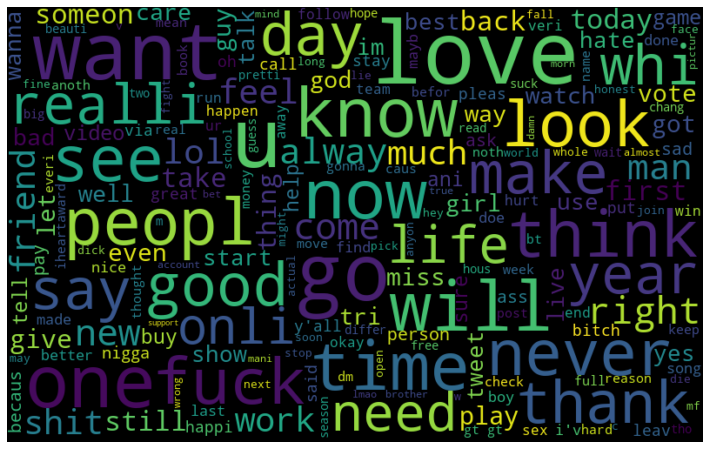

In [97]:
all_words = " ".join([sentence for sentence in English['TextCleaned']])


from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

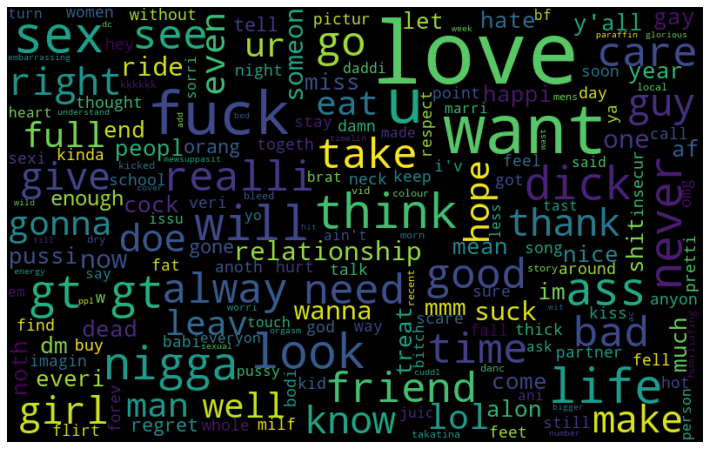

In [98]:
all_words = " ".join([sentence for sentence in English['TextCleaned'][English['label']>3]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

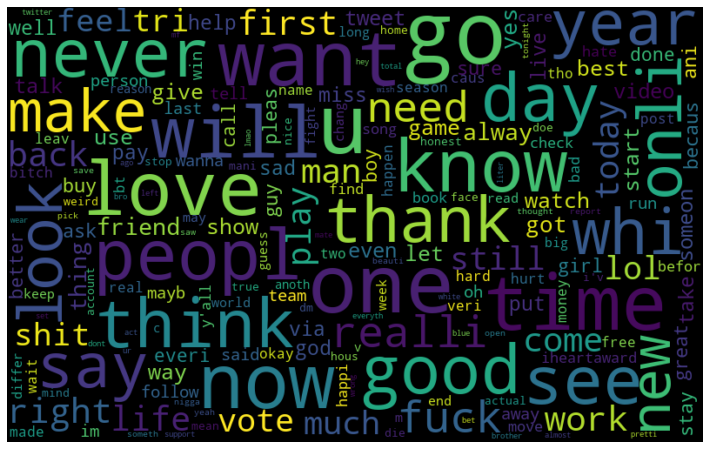

In [99]:
all_words = " ".join([sentence for sentence in English['TextCleaned'][English['label']<3]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

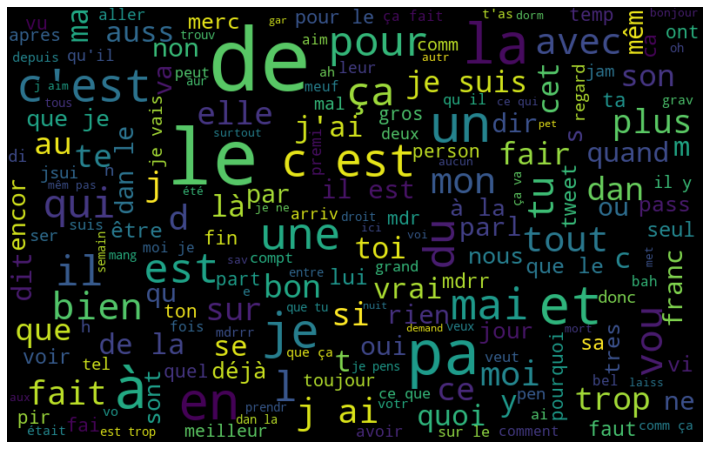

In [100]:
all_words = " ".join([sentence for sentence in French['TextCleaned']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#w+", tweet)
        hashtags.append(ht)
    return hashtags

In [102]:
ht_positive = hashtag_extract(English['TextCleaned'][English['label']==2.6])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(English['TextCleaned'][English['label']>4])

In [103]:
English.head(20)

,text,label,language,TextCleaned
0,wearing a fake engagement ring so guys won’t a...,1.800000,English,wear a fake engag ring so guy won't approach y...
1,Bees vs. Wasps. http,1.000000,English,bee vs. wasps. http
2,Here is a nice equation: 0+0-0-0+0=0,1.000000,English,here is a nice equation: +--+=
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.600000,English,enjoy each new day!
4,I can be having a perfectly good day then I th...,1.600000,English,i can be have a perfect good day then i think ...
5,@user If only we could have seen Thurman vs Je...,1.250000,English,if onli we could have seen thurman vs jeff horn.
6,made really ballerific salted caramel brownies...,1.200000,English,made realli ballerif salt caramel browni and t...
7,@user Every clipper season is easily better th...,1.400000,English,everi clipper season is easili better then ro...
8,“If you trust them they will always be here fo...,3.000000,English,“if you trust them they will alway be here for...
9,@user E no sure for any body,1.000000,English,e no sure for ani bodi


In [104]:
Portuguese.shape
English.shape
French.shape
Italian.shape
Spanish.shape
Chinese.shape

(1596, 4)

In [105]:
!pip install textblob
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
# def getSubjectivity(text):
#     return TextBlob(text).sentiment.subjectivity 
# def getPolarity(text):
#     return TextBlob(text).sentiment.polarity 

In [107]:
finaldf=pd.concat([Portuguese,
English,
French,
Italian,
Spanish,
Chinese], ignore_index=True)
pre=finaldf

In [108]:
def catchsentiment(label):
    if label>3:
        return 'Negative'
    elif label==3:
        return 'Neutral'
    else:
        return 'Positive'
pre['Sentiment']=pre["label"].apply(catchsentiment)
pre.head()

,text,label,language,TextCleaned,Sentiment
0,@user Não tô dizendo que tá certo esse pensame...,2.0,Portuguese,nã tô diz que tá cert esse pensament btw,Positive
1,@user c nao tem talento nenhum clara?,1.6,Portuguese,c nao tem talent nenhum clar ?,Positive
2,@user amo mais Lindo,3.6,Portuguese,amo mais lind,Negative
3,foda é que ela é linda,2.2,Portuguese,fod é que ela é lind,Positive
4,@user @user Exato. Muitos duvidaram dos último...,1.0,Portuguese,exat . muit duvid dos últim lançament com tlou...,Positive


In [109]:
normEng = Cucco()
norms = ['remove_stop_words', 'replace_punctuation', 'remove_extra_whitespaces']
        
        
English = pre[pre['language'] == 'English']
Chinese = pre[pre['language'] == 'Chinese']
French = pre[pre['language'] == 'French']
Italian = pre[pre['language'] == 'Italian']
Portuguese = pre[pre['language'] == 'Portuguese']
Spanish = pre[pre['language'] == 'Spanish']
# English.head(10)

### Percentage of Positive, Negative and Neutral Tweets

In [110]:
postweets=English[English.Sentiment=="Positive"]
postweets=postweets["TextCleaned"]
pos=float(round((postweets.shape[0]/English.shape[0])*100,1))
print(f"{round((postweets.shape[0]/English.shape[0])*100,1)}% \n")
#

postweets=English[English.Sentiment=="Negative"]
postweets=postweets["TextCleaned"]
pos=float(round((postweets.shape[0]/English.shape[0])*100,1))
print(f"{round((postweets.shape[0]/English.shape[0])*100,1)}% \n")

#
postweets=English[English.Sentiment=="Neutral"]
postweets=postweets["TextCleaned"]
pos=float(round((postweets.shape[0]/English.shape[0])*100,1))
print(f"{round((postweets.shape[0]/English.shape[0])*100,1)}% \n")



85.0% 

11.3% 

3.7% 



### Percentage of positive tweets

In [111]:
postweets=pre[pre.Sentiment=="Positive"]
postweets=postweets["TextCleaned"]
pos=float(round((postweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((postweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(postweets.iloc[3113])

80.1% 

mais c ’ est une blagu


### Percentage of neutral tweets

In [112]:
neutraltweets=pre[pre.Sentiment=="Neutral"]
neutralweets=neutraltweets["TextCleaned"]
neu=float(round((neutralweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((neutralweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(neutralweets.iloc[12])

4.9% 

odei fic sent falt e me culp por um bgl que eu sei que eu nã tenh culp pprt mas mantém


### Percentage of negative tweets

In [113]:
negtweets=pre[pre.Sentiment=="Negative"]
negtweets=negtweets["TextCleaned"]
neg=float(round((negtweets.shape[0]/pre.shape[0])*100,1))
print(f"{round((negtweets.shape[0]/pre.shape[0])*100,1)}% \n")
print(negtweets.iloc[12])

15.1% 

nã me acho substitu , pod ocup meu lug mas nunc vã ser com eu


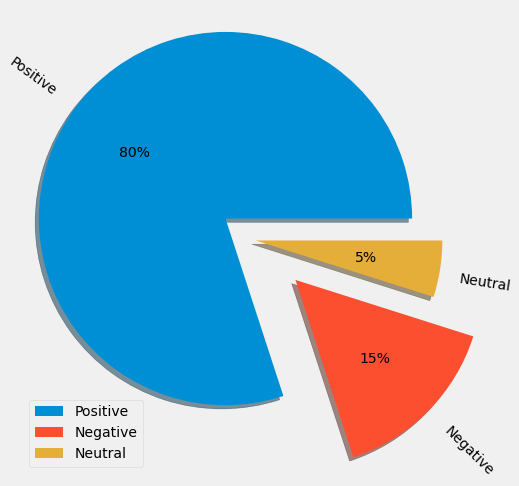

In [114]:
data = {'Positive' : pos,
        'Negative' : neg,
        'Neutral' : neu}
tf = pd.Series(data) 
tf
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
explode=[0.2,0.3,0]
plt.pie(tf,autopct='%.0f%%',explode=explode,labels=tf.index,shadow=True,rotatelabels='true')
plt.legend(loc='lower left')
plt.show()

In [115]:
a=pd.read_csv("TrainProject.csv")
# a.head()
aEng=a[a["language"]=="English"]
print(len(a.index))

9491


## Hashtag

In [116]:
import re
import nltk
text='«\xa0Non à la guerre\xa0» : à Novossibirsk en Sibérie, ces russes sont dans la rue contre «\xa0l’opération militaire\xa0» en #Ukraine. #UkraineRussiaWar https://t.co/tYcWhS6kXO'
ht=re.findall(r"#(\w+)",text)
ht

['Ukraine', 'UkraineRussiaWar']

In [117]:
def ExtractHashtag(tweet):
    hashtag=[]
    for text in tweet:
        ht=re.findall(r"#(\w+)",text)
        hashtag.append(ht)
    return hashtag

In [118]:
def HashtagFrequency(hashtag):
    a=nltk.FreqDist(hashtag)
    df=pd.DataFrame({"Hashtag":list(a.keys()),"Frequency":list(a.values())})
    df=df.nlargest(columns="Frequency",n=100)
    return df

In [119]:
hashtags=ExtractHashtag(aEng["text"])

In [120]:
lst=[[1,3,5],['asd','ad'],["asd"],[1,2,4],[],["we"],[]]
def PassHashtag(hashtags):
    ht=[]
    # cnt=0
    for i in hashtags:
        if(i!=[]):
            for j in i:
                ht.append(j)
    return ht

In [121]:
hashtag=PassHashtag(hashtags)

In [122]:
# hashtag
df=HashtagFrequency(hashtag)
eng=df.head(8)

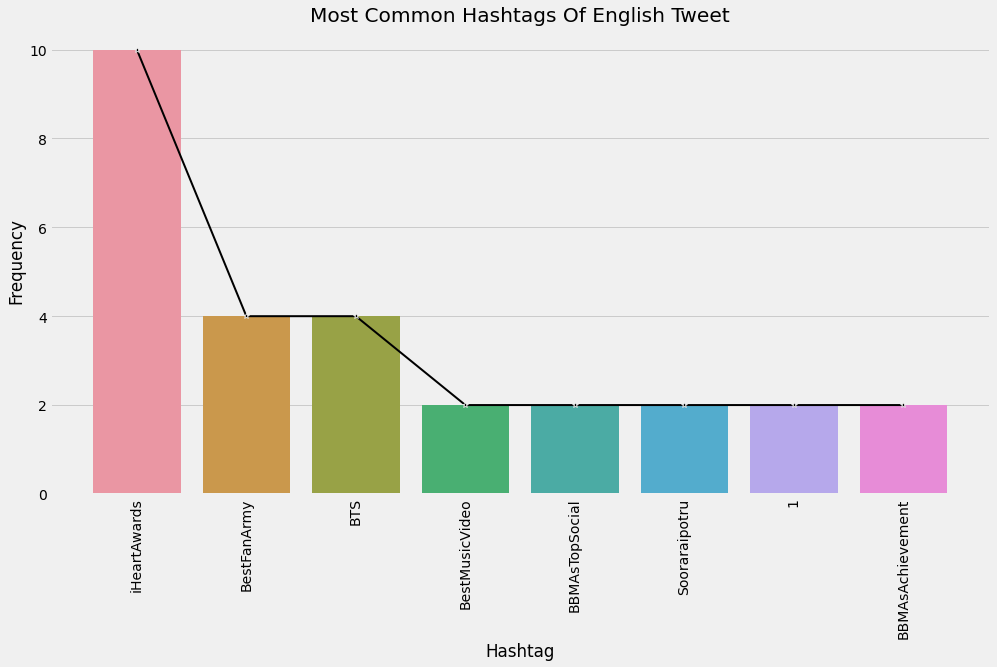

In [123]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data=eng,x="Hashtag",y="Frequency")
sns.lineplot(y=eng['Frequency'],x=eng["Hashtag"],color='black',marker='*',linewidth=2)
plt.title("Most Common Hashtags Of English Tweet")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 0, 'Intimacy')

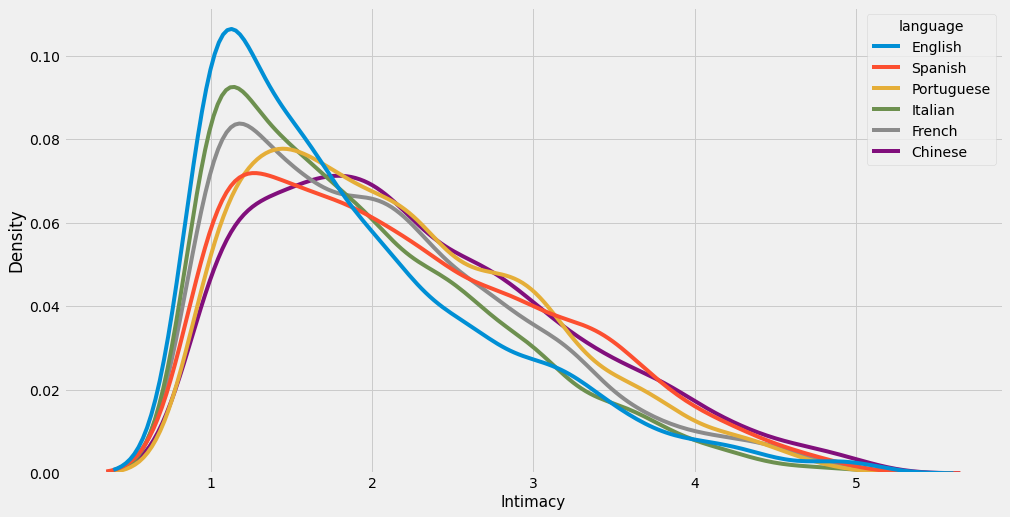

In [124]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=a, x="label",hue="language")
plt.xlabel('Intimacy', fontsize=15)

In [125]:
i=[English,French,Spanish,Portuguese,Chinese,Italian]
sum=0
for j in i:
  sum=sum+len(j.index)
  print(len(j.index),sum)

1587 1587
1588 3175
1592 4767
1596 6363
1596 7959
1532 9491


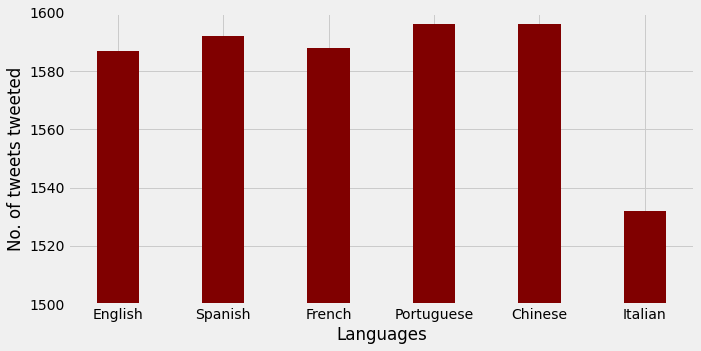

In [126]:
data = {'English':len(English.index), 'Spanish':len(Spanish.index), 'French':len(French.index),
        'Portuguese':len(Portuguese.index),'Chinese':len(Chinese.index),'Italian':len(Italian.index)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.ylim(1500,1600)
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Languages")
plt.ylabel("No. of tweets tweeted")
plt.show()

In [127]:
df.head()

,Hashtag,Frequency
2,iHeartAwards,10
10,BestFanArmy,4
15,BTS,4
1,BestMusicVideo,2
27,BBMAsTopSocial,2


In [128]:
# import pickle
# import re
# import emoji
# with open('Emoji_Dict.p', 'rb') as fp:
#     Emoji_Dict = pickle.load(fp)
# Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}
# def convert_emojis_to_word(text):
#     for emot in Emoji_Dict:
#         text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
#     return text
# df["text"]=df["text"].apply(lambda x:convert_emojis_to_word(x))
# df

FileNotFoundError: ignored

In [129]:
%matplotlib inline
!pip install missingno
!pip install scikit-learn scipy matplotlib
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
df1 = pd.read_csv("123csv.csv",usecols=["cleanedtweet","label"])
df1.head()
df1.dropna(inplace = True)
df1.head()

,label,cleanedtweet
0,2,wear fake engag ring guy approach librari gtgt...
1,1,bee vs wasp http
2,1,nice equat
3,2,enjoy new daysmilingfacewithsmilingeyes🇨🇦lad...
4,2,perfect good day think star war episod instan...


In [132]:
def labelCreate(num):
    num=round(num,0)
    num=int(num)
    return num

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(df1["cleanedtweet"]).toarray()
y=df1.iloc[:,-2].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2,stratify=y)

In [134]:
y

array([2, 1, 1, ..., 2, 2, 1])

In [135]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [136]:
#logistic regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 87.9
Accuracy CV 10-Fold: 40.49
Running Time: 0:09:52.413807


In [137]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train, 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 53.65
Accuracy CV 10-Fold: 36.42
Running Time: 0:01:00.159314


In [138]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, 10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.78
Accuracy CV 10-Fold: 28.19
Running Time: 0:00:22.083720


In [139]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train, 10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 95.79
Accuracy CV 10-Fold: 37.29
Running Time: 0:00:14.686115


In [140]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 93.18
Accuracy CV 10-Fold: 37.53
Running Time: 0:04:29.194952


In [141]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 99.2
Accuracy CV 10-Fold: 36.66
Running Time: 0:23:16.939001


In [142]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log,  acc_gaussian, acc_sgd, acc_linear_svc,acc_dt]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,99.20
4,Linear SVC,95.79
3,Stochastic Gradient Decent,93.18
1,Logistic Regression,87.90
2,Naive Bayes,78.78
0,KNN,53.65


In [143]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Logistic Regression,40.49
3,Stochastic Gradient Decent,37.53
4,Linear SVC,37.29
5,Decision Tree,36.66
0,KNN,36.42
2,Naive Bayes,28.19


<BarContainer object of 6 artists>

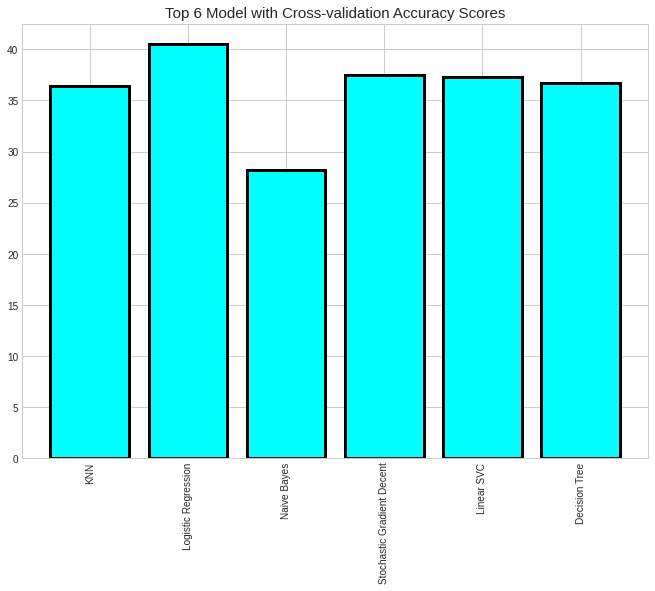

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.xticks(rotation=90)
plt.title('Top 6 Model with Cross-validation Accuracy Scores', fontsize = 15)
plt.bar(cv_models["Model"], cv_models["Score"], color = 'cyan', linewidth = 3, edgecolor = 'k')

<BarContainer object of 6 artists>

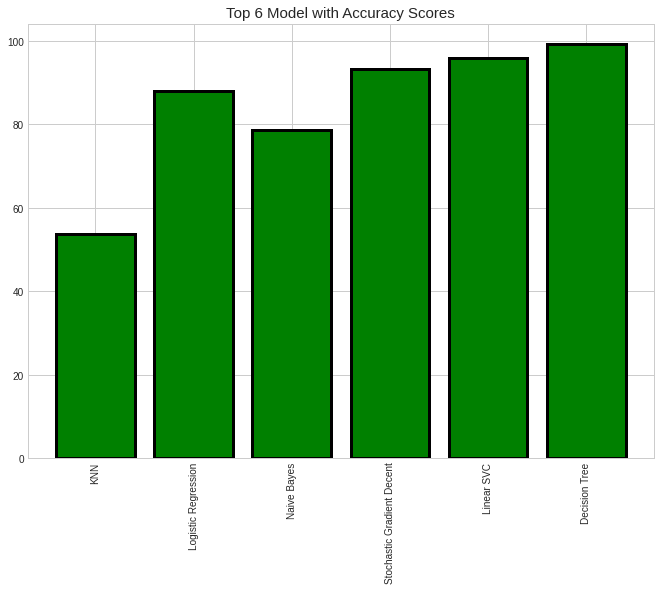

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.xticks(rotation=90)
plt.title('Top 6 Model with Accuracy Scores', fontsize = 15)
plt.bar(models["Model"],models["Score"], color = 'green', linewidth = 3, edgecolor = 'k')

In [146]:
# Importing libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('finalll.csv', encoding='latin-1')
df["cleanedtweet"]=df["cleanedtweet"].astype(str)
df["label"]=df["label"].astype(int)

In [148]:
# df.drop('language', axis=1, inplace=True)
# df
# final=pd.read_csv("preprocessed.csv")
# final.head()

In [149]:
import re

def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', ' ', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', ' ', text)        # removing @mentions
    text = re.sub(r'@[-)]+', ' ', text)            # removing @mentions
    text = re.sub(r'#', ' ', text )                # removing '#' sign
    text = re.sub(r'RT[\s]+', ' ', text)           # removing RT
    text = re.sub(r'https?\/\/\S+', ' ', text)     # removing the hyper link
    text = re.sub(r'&[a-z;]+', ' ', text)          # removing '&gt;'
    text = text.replace("+"," ")
    text = text.replace("-"," ")
    text = text.replace("!"," ")
    text = text.replace("."," ")
    text = text.replace("0","")
    text = text.replace("=","") 
    text = re.sub(r'[!@#$]', '', text)
    return text

# applying the text cleaning function on tweets
df['cleanedtweet'] = df['cleanedtweet'].apply(text_cleaning)
df.sample(10)
final.head()

,Unnamed: 0,text,label,language,TextCleaned
0,0,@liu_xiaoyuan 红外测温仪在室外误差极大。,1.40,Chinese,the infrared thermometer has a huge error out...
1,1,"@user ok, 你的这些所谓举例有跟你指控间谍罪有直接关系嘛？ 你可以对人/事有意见，但...",1.20,Chinese,ok are your socalled examples directly relate...
2,2,不滿意&gt; &lt;昨晚糾結了很久 但畫了這麼久也不想棄掉他們 所以還是把劣作放上來 http,1.60,Chinese,dissatisfied last night i struggled for a long...
3,3,《正信摧邪 - 禁止謗佛者造惡業》 末法時期學佛修行的多，除南無羌佛座下解脫成就眾多弟子之外...,1.20,Chinese,righteous belief and evil forbid those who sl...
4,4,我可以叫你宝宝吗 我看你对我就是这么叫的 http,4.25,Chinese,can i call you baby i see thats what you call ...


In [150]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['cleanedtweet'].values, df['label'].values, test_size=0.30,stratify=df["label"],random_state=3)

# checking the data split
print('sentiment Text: ', x_train[0])
print('sentiment: ', y_train[0])

sentiment Text:  jungkook favorit cover cover
sentiment:  2


In [151]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [152]:
# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [153]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  10820


In [154]:
# converting train and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [928, 490, 491, 491]
Testing sequence:  [1869, 1683, 347, 429, 449]


In [155]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  70


In [156]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  70


In [157]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [158]:
# # compiling the model
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])
model.compile(loss="categorical_crossentropy", optimizer= "Adagrad", metrics=['accuracy'])

In [159]:
# training the mode
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=4)




































































Epoch 1/4
208/208 [==============================] - 12s 44ms/step - loss: 0.0000e+00 - accuracy: 0.4802 - val_loss: 0.0000e+00 - val_accuracy: 0.4877
Epoch 2/4
208/208 [==============================] - 7s 34ms/step - loss: 0.0000e+00 - accuracy: 0.4879 - val_loss: 0.0000e+00 - val_accuracy: 0.4877
Epoch 3/4
208/208 [==============================] - 7s 34ms/step - loss: 0.0000e+00 - accuracy: 0.4879 - val_loss: 0.0000e+00 - val_accuracy: 0.4877
Epoch 4/4
208/208 [==============================] - 7s 35ms/step - loss: 0.0000e+00 - accuracy: 0.4879 - val_loss: 0.0000e+00 - val_accuracy: 0.4877
